<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 8. Unsupervised machine learning

A dataset is a collection of values that are organized in two ways (observations and features). A feature contains all vallues that measure the same attribute (e.g., temparature) across all instances. In other words, feature froms a column. An observation contains all values measured on the same instance (e.g, city) across all attributes. In other words, it forms a row. All these obervational instances forms a table that is called feature matrix in machine learning. 

It has to be mentioned, that features (in machine learning) and varibles (in statistics) are the same concepts. Nevertheles, there is a difference, feature matrix has to contain the same type of data in every cell. The table can contain both types, categorical and continuous data but the first one has to be encoded.

Machine learning is a field that studies, develops and utilizes methods (and algorithms) that utilize data (feature matrix) to to improve performance on some set of tasks (Mitchell, 1997). In the simplified classification, machine learning can be divided into supervised and unsupervised learning (Figure 1). 

TODO: explain differences supervised and unsupervised 

|<img src='images/Machine_learning.svg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 1**: Machine learning structure</em>|

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn differences between supervised and unsupervised learning. In Subsection **8.1** we will explain what dimentionality reduction is usefull for. The V-DEM dataset will function as an example that showcase usage of Principal Component Analysis (PCA) and how it related to Factor Analysis. (LDA?) In Subsection **8.2** you will learn how to perform clustering analysis on the example of K-Means algorithm. You will find out how to find optimal number of clusters. After finishing it you will be able to describe Agglomarative clustering and why to use it. In Subsection **8.3** you will be introduced to Association Rule mining  and ... Python packages. 
    
</div>

2-dimensional data paradigm: observations and features (variables)

Well-behaved (dense and balanced) vs. badly-behaved data (sparse, binary, and/or non-linear)

## 8.1. Dimensionality reduction

https://scikit-learn.org/stable/modules/decomposition.html#decompositions

Hovy textbook chapter 6





### 8.1.1. Structured data

Introduce Principal Component Analysis (PCA) using the VDEM dataset

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

Explain factor analysis and PCA in easy terms

Infer two factors and visualize them

How to interpret the results

Hovy chapter 6.3

caveats re PCA


Assumptions of factor analysis:
features are metric.
features are continious or ordinal
there is r>0.3 between the features 
sample is homogenous 

In [15]:
import pandas as pd

In [620]:
vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Core-v13.csv', encoding='utf-8', low_memory=False)
#vdem = pd.read_csv('../data/V-Dem/V-Dem-CY-Full+Others-v10.csv', encoding='utf-8', low_memory=False)

In [621]:
vdem = vdem[vdem['year'] == 2019].reset_index(drop=True)
vdem.head()

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,v2xme_altinf_sd,v2xps_party,v2xps_party_codelow,v2xps_party_codehigh,v2x_divparctrl,v2x_feduni,v2xca_academ,v2xca_academ_codelow,v2xca_academ_codehigh,v2xca_academ_sd
0,Mexico,MEX,3,2019,2019-12-31,0,1,United Mexican States,1789,2022,...,0.655,0.867,0.739,0.933,-1.239,0.979,0.895,0.826,0.939,0.622
1,Suriname,SUR,4,2019,2019-12-31,0,0,Republic of Suriname [independent state],1900,2022,...,0.649,0.597,0.408,0.761,1.022,0.472,0.828,0.722,0.886,0.620
2,Sweden,SWE,5,2019,2019-12-31,0,1,Kingdom of Sweden,1789,2022,...,0.653,0.996,0.964,1.000,-0.003,0.941,0.951,0.907,0.972,0.618
3,Switzerland,CHE,6,2019,2019-12-31,0,1,Swiss Confederation,1798,2022,...,0.653,0.881,0.731,0.948,0.367,0.997,0.907,0.851,0.949,0.619
4,Ghana,GHA,7,2019,2019-12-31,0,0,Republic of Ghana,1902,2022,...,0.644,0.614,0.505,0.719,-1.380,0.169,0.793,0.682,0.860,0.623


In [622]:
vdem['v2exdfdmhs'].isnull().value_counts()
#'v2exdfcbhs' , 'v2exdjcbhg', 'v2exapup', 'v2exdfdmhs'

False    179
Name: v2exdfdmhs, dtype: int64

In [623]:
vdem[vdem['v2exdfdmhs'].isnull()][vdem["year"]==2019]#.groupby(["country_name","year"])

C:\Users\zagovooa\AppData\Local\Temp\ipykernel_27468\2429219324.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vdem[vdem['v2exdfdmhs'].isnull()][vdem["year"]==2019]#.groupby(["country_name","year"])


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,v2xme_altinf_sd,v2xps_party,v2xps_party_codelow,v2xps_party_codehigh,v2x_divparctrl,v2x_feduni,v2xca_academ,v2xca_academ_codelow,v2xca_academ_codehigh,v2xca_academ_sd


indicators = [
    'v2dlreason', 'v2dlcommon', 'v2dlcountr', 'v2dlconslt', 'v2dlengage', 
    'v2dlencmps', 'v2dlunivl', 'v2cseeorgs', 'v2csreprss', 'v2cscnsult', 
    'v2csprtcpt', 'v2csgender', 'v2csantimv', 'v2csrlgrep', 'v2csrlgcon', 
    'v2mecenefm', 'v2mecenefi', 'v2mecenefibin', 'v2mecrit', 'v2merange', 
    'v2mefemjrn', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2mecorrpt', 
    'v2exrescon', 'v2exbribe', 'v2exembez', 'v2excrptps', 'v2exthftps', 
    'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2clrelig', 'v2clfmove'
]

In [624]:
indicators = [
    'v2mecenefm', 'v2meharjrn', 'v2meslfcen', 'v2mebias', 'v2merange', 'v2mecrit', 'v2cldiscm', 'v2cldiscw', 'v2clacfree',
    
    'v2psparban', 'v2psbars', 'v2psoppaut', 'v2elmulpar', 'v2cseeorgs', 'v2csreprss',
    'v2elsuffrage',
    'v2elembcap', 'v2elrgstry', 'v2elvotbuy', 'v2elirreg', 'v2elintim', 'v2elpeace', 'v2elfrfair',#'v2elembaut', 
    'v2lgbicam', 'v2expathhs', 'v2exhoshog','v2exdfcbhs','v2exdfdmhs',
    #'v2lginello','v2lgelecup','v2lginelup','v2expathhg','v2lgello',
   # 'v2mefemjrn'
]

In [625]:
countries = vdem['country_name'].tolist()
vdem = vdem.set_index('country_name')[indicators]
vdem.shape

(179, 28)

In [626]:
vdem.head()

,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
country_name,,,,,,,,,,,,,,,,,,,,,
Mexico,0.100,0.232,0.844,1.435,1.528,1.628,2.663,1.372,1.800,1.950,...,-0.858,0.740,0.318,-0.990,1.294,2.0,7.0,1.0,1.310,1.654
Suriname,1.063,1.726,0.523,1.650,2.431,1.201,1.792,1.894,1.484,1.906,...,0.357,1.635,1.356,1.182,1.419,1.0,6.0,1.0,1.685,1.826
Sweden,3.400,2.127,2.011,2.316,2.682,3.194,1.936,1.988,3.303,2.427,...,2.447,1.270,1.987,1.449,2.073,1.0,4.0,0.0,-3.438,-3.511
Switzerland,3.185,3.714,3.061,2.697,2.118,2.395,2.590,2.896,3.008,2.461,...,2.251,2.152,1.770,0.864,1.877,2.0,6.0,1.0,-2.923,-3.565
Ghana,2.175,0.633,1.270,1.564,1.756,1.308,2.171,1.590,1.709,1.731,...,-0.777,0.560,0.395,-0.025,1.695,1.0,7.0,1.0,0.092,1.291


Are there missing values?

In [627]:
vdem.isna().sum().value_counts()

0    20
9     7
3     1
dtype: int64

In [628]:
vdem[vdem.isna().any(axis=1)]

,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
country_name,,,,,,,,,,,,,,,,,,,,,
Yemen,-2.238,-1.355,-0.593,-0.153,-0.613,-1.161,-0.917,-0.972,-1.652,1.033,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.942,1.507
South Sudan,-2.690,-1.678,-0.359,-0.863,-1.677,-1.497,-1.939,-0.734,-1.530,1.032,...,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,1.190,1.524
Qatar,-0.983,-1.436,-1.924,-2.281,-2.143,-1.982,-1.340,-1.614,-0.405,-1.512,...,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.0,2.349,1.623
China,-2.103,-1.826,-2.619,-1.751,-2.073,-2.062,-1.565,-1.365,-2.714,-3.080,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,0.0,1.011,0.761
Eritrea,-2.680,-2.803,-2.843,-2.685,-2.671,-2.208,-1.958,-2.273,-2.237,-3.381,...,NaN,NaN,NaN,NaN,NaN,0.0,6.0,1.0,1.035,1.950
Palestine/West Bank,-0.579,0.989,0.277,1.185,0.693,0.792,0.677,0.849,1.244,1.090,...,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.0,1.229,1.575
Somalia,-0.722,-0.223,-0.332,0.932,0.969,0.821,0.205,-0.186,-0.689,0.668,...,NaN,NaN,NaN,NaN,NaN,2.0,6.0,0.0,-1.583,-1.161
Palestine/Gaza,-0.967,-1.271,-1.838,-1.201,0.185,-1.120,-1.166,-1.726,-1.626,0.312,...,NaN,NaN,NaN,NaN,NaN,0.0,8.0,1.0,0.753,0.692
Oman,-0.976,-1.198,-1.732,-1.320,-1.929,-2.078,-0.634,-0.866,-0.681,-1.910,...,0.569,1.13,0.33,0.416,2.01,2.0,4.0,1.0,2.287,1.845


In [629]:
list_countries_na=vdem[vdem.isna().any(axis=1)].index.tolist()
vdem=vdem[~vdem.index.isin(list_countries_na)]
countries = vdem.index.tolist()
vdem.shape

(169, 28)

In [630]:
vdem.isna().sum().value_counts()

0    28
dtype: int64

How are the variables distributed?

In [631]:
vdem.loc[:, :].mean()

v2mecenefm       0.704982
v2meharjrn       0.678580
v2meslfcen       0.668059
v2mebias         0.940988
v2merange        1.004633
v2mecrit         0.933917
v2cldiscm        1.072112
v2cldiscw        0.989828
v2clacfree       0.970787
v2psparban       1.183077
v2psbars         1.316491
v2psoppaut       1.236568
v2elmulpar       0.577876
v2cseeorgs       1.100355
v2csreprss       0.962598
v2elsuffrage    99.617870
v2elembcap       0.957391
v2elrgstry       0.715456
v2elvotbuy       0.004929
v2elirreg        0.111893
v2elintim        0.179740
v2elpeace        0.301976
v2elfrfair       0.220041
v2lgbicam        1.414201
v2expathhs       6.106509
v2exhoshog       0.355030
v2exdfcbhs       0.006882
v2exdfdmhs      -0.074189
dtype: float64

In [632]:
vdem.loc[:, ~vdem.columns.isin(['v2mefemjrn','v2elsuffrage'])].mean()#,'v2lgello'

v2mecenefm    0.704982
v2meharjrn    0.678580
v2meslfcen    0.668059
v2mebias      0.940988
v2merange     1.004633
v2mecrit      0.933917
v2cldiscm     1.072112
v2cldiscw     0.989828
v2clacfree    0.970787
v2psparban    1.183077
v2psbars      1.316491
v2psoppaut    1.236568
v2elmulpar    0.577876
v2cseeorgs    1.100355
v2csreprss    0.962598
v2elembcap    0.957391
v2elrgstry    0.715456
v2elvotbuy    0.004929
v2elirreg     0.111893
v2elintim     0.179740
v2elpeace     0.301976
v2elfrfair    0.220041
v2lgbicam     1.414201
v2expathhs    6.106509
v2exhoshog    0.355030
v2exdfcbhs    0.006882
v2exdfdmhs   -0.074189
dtype: float64

In [633]:
import matplotlib.pyplot as plt
import seaborn as sns

In [634]:
sns.set_theme(style='darkgrid')

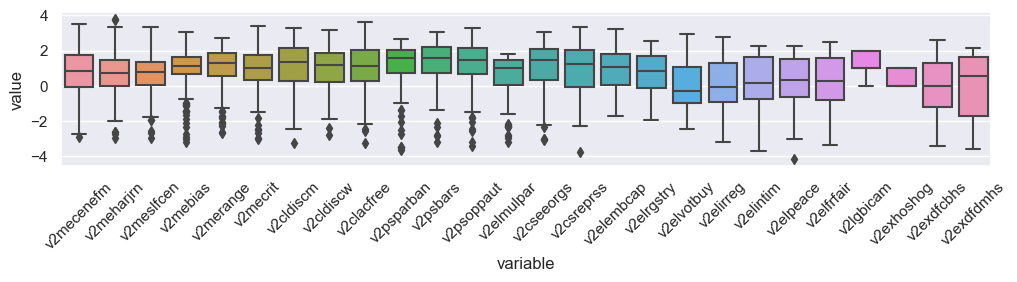

In [635]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, ~vdem.columns.isin(['v2mefemjrn','v2elsuffrage','v2expathhs'])].melt()#,'v2lgello'
)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

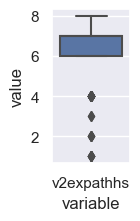

In [636]:
plt.figure(figsize=[1, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, vdem.columns.isin(['v2expathhs'])].melt()
)

<AxesSubplot:xlabel='variable', ylabel='value'>

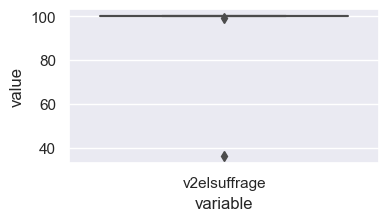

In [637]:
plt.figure(figsize=[4, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = vdem.loc[:, vdem.columns.isin(['v2elsuffrage'])].melt()#'v2lgello'
)

In [638]:
X_vdem = vdem.to_numpy()

In [639]:
from sklearn.preprocessing import StandardScaler

In [640]:
X_vdem = StandardScaler().fit_transform(X_vdem)

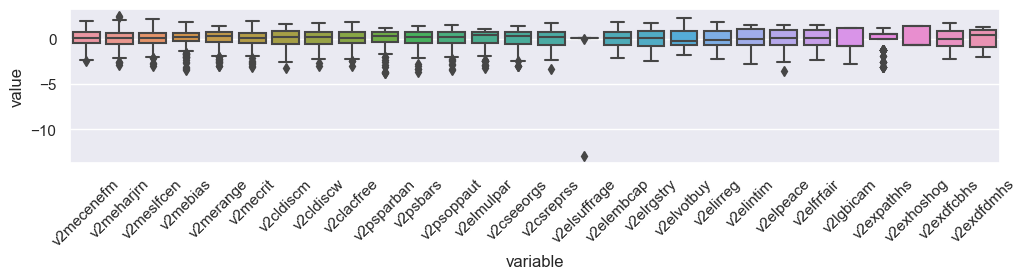

In [641]:
plt.figure(figsize=[12, 2])
sns.boxplot(
    x = 'variable', 
    y = 'value', 
    data = pd.DataFrame(data=X_vdem, columns=indicators).melt()
)
plt.xticks(rotation=45)
plt.show()

In [642]:
vdem_z=pd.DataFrame(data=X_vdem, columns=indicators,index=countries)

In [643]:
vdem_z.head()

,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2lgbicam,v2expathhs,v2exhoshog,v2exdfcbhs,v2exdfdmhs
Mexico,-0.409599,-0.353126,0.145535,0.413101,0.433327,0.540235,1.181993,0.302050,0.587808,0.613223,...,-0.645696,0.431409,0.098918,-1.020694,0.713297,1.161255,0.551190,1.347838,0.848370,0.985447
Suriname,0.242393,0.828230,-0.119991,0.592888,1.180975,0.207882,0.534860,0.714613,0.363803,0.578041,...,0.263441,1.046131,0.841552,0.695241,0.796319,-0.821090,-0.065705,1.347838,1.092506,1.083525
Sweden,1.824642,1.145315,1.110859,1.149809,1.388793,1.759122,0.641849,0.788906,1.653245,0.994627,...,1.827306,0.795434,1.292999,0.906177,1.230690,-0.821090,-1.299495,-0.741929,-2.242723,-1.959736
Switzerland,1.679077,2.400209,1.979402,1.468408,0.921824,1.137225,1.127756,1.506544,1.444128,1.021813,...,1.680647,1.401227,1.137747,0.444013,1.100512,1.161255,-0.065705,1.347838,-1.907442,-1.990528
Ghana,0.995265,-0.036042,0.497916,0.520974,0.622102,0.291165,0.816449,0.474346,0.523300,0.438113,...,-0.585087,0.307778,0.154007,-0.258319,0.979632,-0.821090,0.551190,1.347838,0.055415,0.778457


<b>Factor Analysis</b>

In social sciences one deals a lot with abstract concepts that one can't directly observe and are difficult to measure empirically. For example, imagine we want to measure electoral democracies of given countries. Since electoral democracy is not a material thing, one can't look at country and measure phisically the amount of this democracy. In other words, this is a concept developed by political and social scientists and such a variable that represents it is called 'unobserved' or 'latent' variable (McLevey, 2022).    

In order to succied, we would need to find/develop measurement strategies and models that are transparently validated. First, we will need to develop conceptual and operational definition of electoral democracy. A conceptiual definition includes describing how abstarct concept relates to other concepts. It can be done by dividing it into more specific aspects/dimensions. Second, we would need to define operational definition that describes "specific operations that one would have to perform to generate empirical obeservations(i.e. data) for each of the various dimension."(MCLevey, 2022) These variables that are observed are called indicator variables.   

According to Coppedge et. al (2021), electoral democracy is divided into five concepts (Figure, 2):  
1) Freedom of expression,
2) Freedom of association,
3) Share of adults citizens with suffrage,
4) Officials are elected.

Where each of this concepts is composed of many other features (Figure 2, top-level). Since we have these observations for many countries in our dataset. Let us test this theoretical model of latent factors using factor analysis.

|<img src='images/Latent_variables.jpg' style='float: none; width: 640px'>|
|:--|
|<em style='float: center'>**Figure 2**: Latent variables - at the top are observable features... (MCLevey, 2022)</em>|

In broader sence, factor analysis objectives are 1) to reduce the number of features, 2) find latent variables. In other words, we will try to cluster features in a meaningful way. This can be achived by checking correlations between features and finding groups of features that are highly correlated between each other and are not correlated with leftover variables.  


We would need to import neccesary packages.

In [644]:
#!pip install factor-analyzer
# Instantiate factor analysis object
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

First, we would need to investigate our correlation matrix. For that perpose we would display correlation matrix as heatmap using seaborn package. Parameters xticklabels and  yticklabels we use in order to display all variables. 

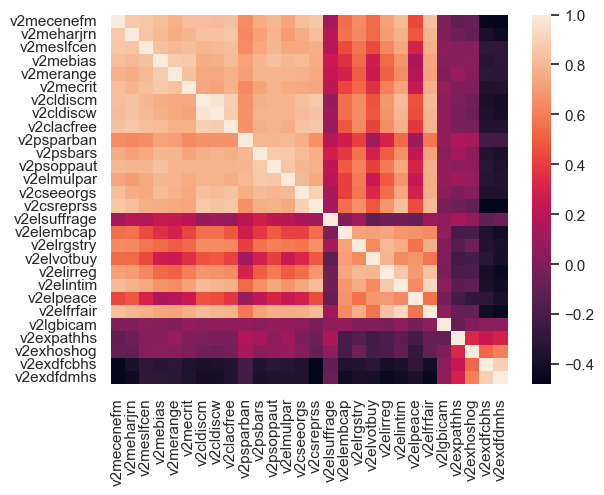

In [645]:
#c = pd.DataFrame(FactorAnalyzer(n_factors=vdem_z.shape[1]).fit(vdem_z).corr_,index=indicators,columns=indicators)
c = vdem_z.corr() #or you can calculate correlationmatrix using pandas
sns.heatmap(c,xticklabels=True, yticklabels=True); 

According to the plot we see 3 highly correlated groups. First fifteen variables, then from v2elembcap to v2elfrfair and last four.  

Should we drop some variables?

On this stage we can also remove variables that have low correlations. As a rule of thumb, we will drop variables with all correlations lower than 0.3. We will investigate values "v2elsuffrage","v2lgbicam","v2expathhs"

In [646]:
c[["v2elsuffrage","v2lgbicam","v2expathhs"]]

,v2elsuffrage,v2lgbicam,v2expathhs
v2mecenefm,0.118293,-0.003476,-0.113154
v2meharjrn,0.200896,-0.002816,-0.069003
v2meslfcen,0.168224,0.029786,0.021858
v2mebias,0.248305,0.019429,0.020867
v2merange,0.236839,-0.000838,0.078895
v2mecrit,0.202921,0.072325,-0.004678
v2cldiscm,0.071463,0.041458,-0.007477
v2cldiscw,0.098513,0.052704,-0.019199
v2clacfree,0.091021,0.051669,-0.019265
v2psparban,0.201464,0.068248,0.155502


Variables "v2elsuffrage" (percent of population with suffrage) and "v2lgbicam" (legislature bicameral) do not have even moderate correlations with outher variables. If we return back to Figure 2. We will see that in or theoretical model "Suffrage" is one separate indices that can contribute to Electoral democracy latent variable. 

We will remove both these variables from our model and thus decrease our model to 4 subgroups, i.e., factors. But before dong that we will perform two test: 
1) Bartlett's test - helps us to judge if every variable correlates badly with all other variables. If it is not then we can apply factor analysis. 
2) Kaiser-Meyer-Olkin (KMO) - esimates suitability of our data for factor analysis. It will give us as result two parameters: adequacy for each observed variable and complete model.


In [670]:
#Bartlett's test 
chi_square_value,p_value=calculate_bartlett_sphericity(vdem_z)
print (chi_square_value, p_value)

5938.765156724473 0.0


According to p-value the test was statistically signifficant, i.e., it is suitable for factor analysis. 

In [672]:
#KMO
kmo_all,kmo_model=calculate_kmo(vdem_z)
print (kmo_all)
print (kmo_model)

[0.9789873  0.95959871 0.97472181 0.95067622 0.97330163 0.97034644
 0.933202   0.93676292 0.98343519 0.9610779  0.96993514 0.9638055
 0.96167899 0.95245718 0.95998995 0.95715195 0.95537412 0.92326731
 0.95033454 0.95184067 0.92975083 0.9561619  0.72978101 0.79383431
 0.83695978 0.82755174]
0.9517484092989333


Here, values lower than 0.6 are considered inadequate. In our case those are veraibles 16 and 24 that correspond to "v2elsuffrage" and "v2lgbicam". We will remove them from our model.  

In [650]:
indicators.remove('v2lgbicam')
indicators.remove('v2elsuffrage')
vdem_z=vdem_z.drop(['v2lgbicam','v2elsuffrage'], axis=1)

After removing variables we left with our theoretical model that have 4 factors. So, let us fit this model. 

In order to improve interpetability we will add rotation parameter, in this case Varimax rotation. More on that you can find here ...  

"Create an optimal number of factors i.e. 5 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities."

In [651]:
factor_an = FactorAnalyzer(n_factors=4,rotation="varimax")
factor_an.fit(vdem_z)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

Now we can interpret the factors using loading, variance and commonalities. 

In [652]:
pd.DataFrame(factor_an.loadings_, columns=["Factor1","Factor2","Factor3","Factor4"], index=[vdem_z.columns])

,Factor1,Factor2,Factor3,Factor4
v2mecenefm,0.823459,0.391513,-0.191709,-0.108896
v2meharjrn,0.795262,0.419692,-0.138434,-0.128731
v2meslfcen,0.853506,0.291720,-0.016779,-0.156637
v2mebias,0.928771,0.110394,-0.048329,-0.105108
v2merange,0.902107,0.085170,-0.053262,-0.067098
v2mecrit,0.854195,0.211207,-0.095011,-0.150742
v2cldiscm,0.805766,0.419084,-0.095551,0.072281
v2cldiscw,0.803641,0.410762,-0.097604,0.069615
v2clacfree,0.845371,0.341203,-0.063425,-0.034843
v2psparban,0.816386,0.015310,0.061729,0.322608


These values (loadings) show the relative contribution of variable towards the factor. 

"Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables. Values close to 0 indicates that the factor has a lower influencer on the variable."

For example, Factor4 have high factor loadings for v2csgender (chief security officer womens participation) and v2mefemjrn (Percent of female journalists). 

In [653]:

pd.DataFrame(factor_an.get_factor_variance(), columns=["Factor1","Factor2","Factor3","Factor4"], 
             index=["SumSquare Loadings","Proportional Variance","Cumulative Variance"])

,Factor1,Factor2,Factor3,Factor4
SumSquare Loadings,12.378151,5.135683,2.420534,0.566115
Proportional Variance,0.476083,0.197526,0.093097,0.021774
Cumulative Variance,0.476083,0.673609,0.766706,0.788480


We can say that about 78% of the variance is explained by five factors.


"Communality is the proportion of each variable’s variance that can be explained by the factors. "

"The proportion of common variance present in a variable is known as the communality"

In [654]:
pd.DataFrame(factor_an.get_communalities(),index=vdem_z.columns,columns=['Communalities'])

,Communalities
v2mecenefm,0.879978
v2meharjrn,0.844319
v2meslfcen,0.838389
v2mebias,0.888185
v2merange,0.828390
v2mecrit,0.806009
v2cldiscm,0.839245
v2cldiscw,0.828937
v2clacfree,0.836308
v2psparban,0.774607


In [ ]:
new_variables = factor_an.fit_transform(vdem_z)

"We could use these new factors as variable for other analysis or for prediction. Here is the code to apply the factors to the entire dataframe and create the 3 new variables, that could be used as replacement for the " 35 variables.

"To figure out how many factors we would need, we can look at eigenvalues, which is a measure of how much of the variance of the variables does a factor explain. An eigenvalue of more than one means that the factor explains more variance than a unique variable. An eigenvalue of 2.5 means that the factor would explain the variance of 2.5 variables, and so on."


Calculate the eigenvalues, given the factor correlation matrix.

"In factor analysis, eigenvalues are used to condense the variance in a correlation matrix."

In [655]:
#to improve interpretability we will specify rotation of the factors, in this case Varimax rotation. More on that you can find here ...

factor_an = FactorAnalyzer(n_factors=vdem_z.shape[1],rotation='varimax').fit(vdem_z)

# Check Eigenvalues
ev, v = factor_an.get_eigenvalues()
ev

array([15.76600608,  3.17678623,  1.7281158 ,  0.83027676,  0.63452616,
        0.54949963,  0.42685608,  0.37515205,  0.34184408,  0.2822447 ,
        0.25858436,  0.2092882 ,  0.17715918,  0.15804807,  0.1514223 ,
        0.13644885,  0.11818447,  0.11158538,  0.10855381,  0.09622148,
        0.086178  ,  0.075663  ,  0.07128622,  0.0588392 ,  0.04555379,
        0.02567612])

"Eigenvalues are nothing but the amount of variance the factor explains. We will select the number of factors whose eigenvalues are greater than 1."
We select 3. 

"These techniques differ in the communality estimates that are used. Simplistically, though, factor analysis derives a mathematical model from which factors are estimated, whereas principal components analysis merely decomposes the original data into a set of linear variates"


"only factor analysis can estimate the underlying factors, and it relies on various assumptions for these estimates to be accurate. Principal components analysis is concerned only with establishing which linear components exist within the data and how a particular variable might contribute to that component. "

"The first is to assume that all of the variance is common variance. As such, we assume that the communality of every variable is 1. By making this assumption we merely transpose our original data into constituent linear components (known as principal components analysis)"

" The second approach is to estimate the mount of common variance by estimating communality values for each variable. There
are various methods of estimating communalities, but the most widely used (including
alpha factoring) is to use the squared multiple correlation (SMC) of each variable with all
others. So, for the popularity data, imagine you ran a multiple regression using one meas-
ure (Selfish) as the outcome and the other five measures as predictors: the resulting multi-
ple R2 (see section 7.6.2) would be used as an estimate of the communality for the variable
Selfish. This second approach is used in factor analysis. "

In [540]:
#################### ------ PCA ---- 

#no that is pca terminology 
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=vdem_z.shape[1], random_state=0,rotation='varimax')
#z = transformer.fit_transform(vdem)
X= transformer.fit(vdem_z)

pd.DataFrame(transformer.components_,columns=indicators)
#get_feature_names_out()
#transformer.mean_

,v2mecenefm,v2meharjrn,v2meslfcen,v2mebias,v2merange,v2mecrit,v2cldiscm,v2cldiscw,v2clacfree,v2psparban,...,v2elembcap,v2elrgstry,v2elvotbuy,v2elirreg,v2elintim,v2elpeace,v2elfrfair,v2expathhs,v2exhoshog,v2exdfcbhs
0,-0.825380,-0.800712,-0.844195,-0.908628,-0.888042,-0.840289,-0.827149,-0.825463,-0.856035,-0.824179,...,-0.295614,-0.483961,-0.204226,-0.460983,-0.669571,-0.134691,-0.728684,-0.101243,-0.083186,0.309035
1,0.393627,0.408393,0.285706,0.118452,0.090922,0.226390,0.388345,0.379420,0.313392,-0.012467,...,0.760858,0.678956,0.799078,0.794142,0.645680,0.782107,0.572830,-0.256657,-0.213050,-0.246425
2,-0.133598,-0.089811,0.016497,-0.025160,-0.026654,-0.048692,-0.055927,-0.057743,-0.039456,0.071223,...,-0.104008,-0.016808,-0.087045,-0.080810,-0.047768,-0.139349,-0.058128,0.352029,0.635363,0.600558
3,0.055116,-0.058198,0.044956,0.102703,0.111671,0.181492,-0.210389,-0.216847,-0.124737,-0.025736,...,-0.046814,0.010962,0.000260,0.070842,0.048050,-0.102621,0.103234,-0.065662,0.036581,-0.025724
4,0.052471,0.092389,0.060228,-0.014126,-0.039175,-0.018688,-0.007756,0.009712,-0.001749,0.027388,...,0.015939,-0.113143,0.110904,-0.047964,-0.065329,0.028957,-0.103838,-0.006782,-0.021975,0.026806
5,0.005482,-0.054808,-0.045951,-0.089837,-0.070933,-0.066133,0.092913,0.059713,0.065351,-0.069342,...,-0.071153,-0.092057,-0.002662,0.045460,0.119638,0.081264,0.020611,-0.124609,-0.018283,0.057142
6,-0.071596,-0.029665,-0.016406,-0.046969,0.017834,-0.020705,0.062994,0.057503,-0.004436,0.018703,...,-0.020942,-0.030978,-0.067751,-0.010315,0.024634,0.064223,0.035126,0.249682,-0.020380,0.014030
7,0.022091,-0.035354,-0.077009,-0.037425,-0.032486,-0.061190,0.015787,-0.009323,0.024832,0.022405,...,-0.018372,0.039864,-0.034213,-0.006700,0.036892,0.026258,0.020339,-0.009232,0.044709,-0.057858
8,0.087881,0.149534,0.155608,0.085209,0.081730,0.134221,0.011467,0.007298,0.083292,-0.258680,...,-0.104172,-0.099851,0.069273,0.088914,-0.001682,-0.014722,-0.018803,-0.066372,-0.052827,0.057601
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


PCA

In [656]:
from sklearn.decomposition import PCA

In [657]:
pca_vdem = PCA(random_state=42)

In [658]:
X_vdem_pca = pca_vdem.fit_transform(X_vdem)

In [659]:
X_vdem_pca.shape

(169, 28)

In [660]:
vdem_pc = pd.DataFrame(X_vdem_pca, index=countries)
vdem_pc.columns=[f'PC {i}' for i in vdem_pc.columns]
vdem_pc

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 18,PC 19,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27
Mexico,-1.438538,-1.818249,1.476006,-1.216981,-0.094232,0.657001,-0.669787,0.262883,-0.437669,0.793564,...,-0.053631,-0.314031,0.162742,0.381916,0.152438,-0.184292,-0.520497,0.101000,-0.012627,0.546892
Suriname,-2.333868,-0.953136,2.036142,0.692177,0.055665,-0.739447,-0.517632,-0.582633,-0.254482,0.401966,...,0.130020,0.138356,-0.225840,0.208648,0.418866,0.190824,-0.172703,0.422634,0.061341,-0.175484
Sweden,-6.178093,1.856498,-1.464177,0.556495,0.193214,-0.805514,-0.544305,0.775333,-0.045021,-0.665494,...,0.571182,-0.271178,0.213615,0.135762,-0.170644,-0.336754,0.505857,0.008257,-0.062678,-0.148534
Switzerland,-6.421035,0.550819,-0.195888,-0.787005,-0.250548,0.136653,0.171721,1.291289,-1.362167,-1.772754,...,-0.226580,-0.093805,-0.161308,0.101737,0.565532,-0.124907,0.081491,-0.152165,-0.014792,-0.228751
Ghana,-2.198007,-1.742405,0.834867,0.831883,0.059662,-0.027811,-0.819217,0.168141,-0.602985,0.474934,...,0.164949,0.101589,-0.605580,0.354359,-0.233102,0.045603,-0.192182,0.385204,-0.111679,0.197366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,-1.670327,0.411096,-1.829752,-0.228788,1.602733,-1.794832,-1.839360,-1.278943,0.097616,0.493429,...,-0.158795,-0.228621,0.380601,0.050602,-0.343008,0.200636,0.381190,-0.384895,0.277081,0.425978
Vanuatu,-3.349970,0.609554,-1.940006,1.123760,0.474040,0.459395,-0.330576,-0.263403,-0.970847,0.742020,...,0.267903,1.047103,0.269779,0.328344,0.168588,-0.205841,0.136360,-0.564662,0.071429,-0.256566
United Arab Emirates,7.837812,7.467330,5.407925,1.700863,10.230731,3.270410,-0.210641,1.624999,0.592713,-0.081331,...,-0.032475,-0.002581,-0.075341,-0.080148,0.078549,0.049275,0.030835,0.040438,-0.056285,0.001389
Hungary,0.410306,1.824618,-1.071209,0.873162,-0.802319,0.968431,-1.133072,-0.531713,0.256682,-0.181618,...,0.136604,-0.422721,-0.442213,-0.424144,0.385076,-0.133066,-0.085175,0.017124,0.050859,-0.030217


In [661]:
sum(pca_vdem.explained_variance_ratio_)

1.0000000000000002

In [662]:
import numpy as np

Text(0, 0.5, 'Cumulative explained variance')

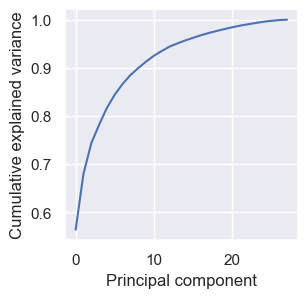

In [663]:
plt.figure(figsize=[3, 3])
plt.plot(np.cumsum(pca_vdem.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Cumulative explained variance')

PCA describes as many components as there are variables; the `n_components` parameter just means how many of those are kept.

How many components to keep?

In [664]:
eigenvalues_vdem = pd.Series(pca_vdem.explained_variance_)
eigenvalues_vdem

0     15.882919
1      3.270019
2      1.789568
3      1.080948
4      0.992019
5      0.769427
6      0.621777
7      0.518622
8      0.413445
9      0.377134
10     0.341920
11     0.277552
12     0.259236
13     0.183000
14     0.173872
15     0.154473
16     0.149448
17     0.131405
18     0.117659
19     0.112045
20     0.106590
21     0.093012
22     0.083335
23     0.074566
24     0.070370
25     0.055752
26     0.040804
27     0.025751
dtype: float64

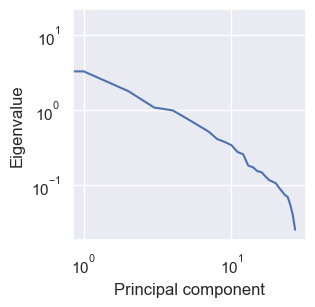

In [665]:
plt.figure(figsize=[3, 3])
plt.plot(eigenvalues_vdem)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.xscale('log')
plt.yscale('log')

In [666]:
pd.DataFrame(zip(X_vdem_pca[:, 0], X_vdem_pca[:, 1]), columns=['PC1', 'PC2'])

,PC1,PC2
0,-1.438538,-1.818249
1,-2.333868,-0.953136
2,-6.178093,1.856498
3,-6.421035,0.550819
4,-2.198007,-1.742405
...,...,...
164,-1.670327,0.411096
165,-3.349970,0.609554
166,7.837812,7.467330
167,0.410306,1.824618


In [667]:
vdem_pc.head()

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,...,PC 18,PC 19,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27
Mexico,-1.438538,-1.818249,1.476006,-1.216981,-0.094232,0.657001,-0.669787,0.262883,-0.437669,0.793564,...,-0.053631,-0.314031,0.162742,0.381916,0.152438,-0.184292,-0.520497,0.101000,-0.012627,0.546892
Suriname,-2.333868,-0.953136,2.036142,0.692177,0.055665,-0.739447,-0.517632,-0.582633,-0.254482,0.401966,...,0.130020,0.138356,-0.225840,0.208648,0.418866,0.190824,-0.172703,0.422634,0.061341,-0.175484
Sweden,-6.178093,1.856498,-1.464177,0.556495,0.193214,-0.805514,-0.544305,0.775333,-0.045021,-0.665494,...,0.571182,-0.271178,0.213615,0.135762,-0.170644,-0.336754,0.505857,0.008257,-0.062678,-0.148534
Switzerland,-6.421035,0.550819,-0.195888,-0.787005,-0.250548,0.136653,0.171721,1.291289,-1.362167,-1.772754,...,-0.226580,-0.093805,-0.161308,0.101737,0.565532,-0.124907,0.081491,-0.152165,-0.014792,-0.228751
Ghana,-2.198007,-1.742405,0.834867,0.831883,0.059662,-0.027811,-0.819217,0.168141,-0.602985,0.474934,...,0.164949,0.101589,-0.605580,0.354359,-0.233102,0.045603,-0.192182,0.385204,-0.111679,0.197366


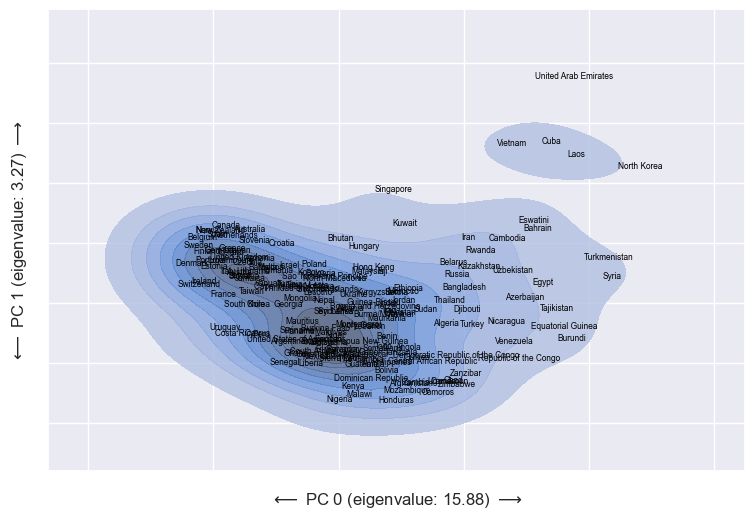

In [668]:
plt.figure(figsize=[9, 6])
ax = sns.kdeplot(data=vdem_pc, x='PC 0', y='PC 1', alpha=.8, fill=True)
for i, country in enumerate(vdem_pc.index):
    ax.text(
        x = vdem_pc['PC 0'][i], 
        y = vdem_pc['PC 1'][i], 
        s = country, 
        horizontalalignment = 'left', 
        size = 6, 
        color = 'black', 
        weight = 'normal'
    )
ax.set(xticklabels=[], yticklabels=[])
ax.set(
    xlabel = f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$', 
    ylabel = f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$'
)
plt.show()

"Run factor analysis if you assume or wish to test a theoretical model of latent factors causing observed variables. Run principal component analysis If you want to simply reduce your correlated observed variables to a smaller set of important independent composite variables."

BOX: How is PCA related to FactorAnalysis?
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

BOX: Why is that machine learning?

### 8.1.2. Unstructured (text) data

Introduce other methods (Non-negative matrix factorization, Sparse PCA, Kernel PCA, Truncated Singular Value Decomposition aka LSI, Latent Dirichlet Allocation, etc.): https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

#### Latent Dirichlet Allocation (LDA)

Generative probabilistic model

Bayesian method

LDA vs. clustering self-trained word embeddings from session 6 (Hovy chapter 9.6)

Caveats

Data: the same corpus that was prepared in session 6

Shortly mention the sklearn LDA pipeline?

gensim for LDA (Hovy chapter 9.2)

BOX: Structural topic model: Hovy chapter 9.4

## 8.2. Clustering

https://scikit-learn.org/stable/modules/clustering.html#clustering

### 8.2.1. Structured data

VDEM dataset

#### K-Means

How it works, when to use it

Silhouette score to find optimal number of clusters: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation and https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

def plot_vectors(vectors, title='VIZ', labels=None, dimensions=3):
    # set up graph
    fig = plt.figure(figsize=(3, 3))
    
    # create data frame
    df = pd.DataFrame(data={'x': vectors[:, 0], 'y': vectors[:, 1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
        #print(df.label)
    else:
        df['label'] = [''] * len(df)
    
    # assign colors to labels
    cm = plt.get_cmap('Set1') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i / n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
    
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:, 2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca()
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])
        
        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
        
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=5)
    
    else:
         raise NotImplementedError()
    
    plt.title(title)
    #plt.show()
    
    if dimensions == 3:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 $\longrightarrow$')
        ax.set_zlabel(f'$\longleftarrow$ PC 2 $\longrightarrow$')
    elif dimensions == 2:
        ax.set_xlabel(f'$\longleftarrow$ PC 0 (eigenvalue: {np.round(eigenvalues_vdem.loc[0], 2)}) $\longrightarrow$')
        ax.set_ylabel(f'$\longleftarrow$ PC 1 (eigenvalue: {np.round(eigenvalues_vdem.loc[1], 2)}) $\longrightarrow$')        
    else:
         raise NotImplementedError()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


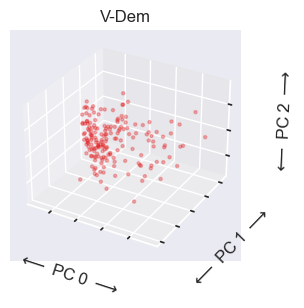

In [30]:
n_components = 3

plot_vectors(vectors=X_vdem_pca[:, :n_components], title='V-Dem', labels=None, dimensions=n_components)

BOX: Other methods for identifying optimal number of clusters; https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

#### Agglomarative clustering

How it works, when to use it

Silhouette score from the beginning

### 8.2.2. Unstructured (text) data

Mention available methods: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Introduce trick to use dimensionality reduction before (K-Means) clustering; https://datascience.stackexchange.com/questions/23591/clustering-algorithms-for-high-dimensional-binary-sparse-data

## 8.3. Association rule mining

https://sherbold.github.io/intro-to-data-science/05_Association-Rule-Mining.html

use http://rasbt.github.io/mlxtend/?

Describe associations for TweetsCOV19 tweets

## Commented references

### Recommended textbooks

Hovy, D. (2020). *Text Analysis in Python for Social Scientists: Discovery and Exploration*. Cambridge University Press. https://doi.org/10.1017/9781108873352. *ADD COMMENT*

### Other cited references

...

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: ...

Contributors: ...

Acknowledgements: ...

Version date: XX. February 2023

License: ...
</div>

#### Notes to be removed before publication

- ...